In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt 
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
#print(tf.__version__)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels) ,(test_images,test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['Tshirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'] 

In [4]:
len(class_names)

10

In [5]:
train_images.shape


(60000, 28, 28)

In [6]:

len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape


(10000, 28, 28)

In [9]:
test_labels


array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [10]:
len(test_labels)

10000

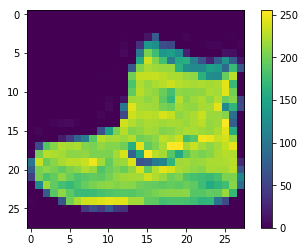

In [11]:
#preprocess data 
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

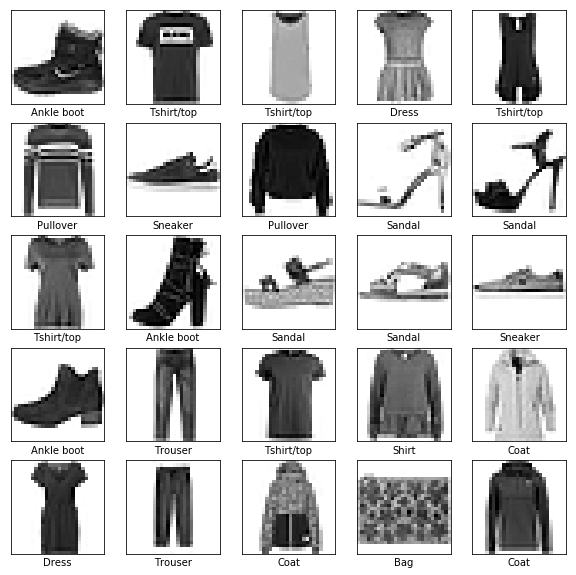

In [12]:
plt.figure(figsize= (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show

In [13]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape = (28,28)),
        keras.layers.Dense(128,activation = 'relu'),
        keras.layers.Dense(10)
    
])

In [14]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'] 
              
             )

In [15]:
model.fit(train_images,train_labels,epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 95us/sample - loss: 2.9262 - accuracy: 0.6880
Epoch 2/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.7025 - accuracy: 0.7425
Epoch 3/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.6224 - accuracy: 0.7682
Epoch 4/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.5877 - accuracy: 0.7766
Epoch 5/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.5752 - accuracy: 0.7839
Epoch 6/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.5462 - accuracy: 0.7997
Epoch 7/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.5074 - accuracy: 0.8223
Epoch 8/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.4942 - accuracy: 0.8276
Epoch 9/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.4854 - accuracy: 0.8340
Epoch 10/10
60

In [16]:
test_loss, test_acc = model.evaluate(test_images ,test_labels ,verbose = 2)
print(test_loss)
print(test_acc)

10000/10000 - 1s - loss: 0.5130 - accuracy: 0.8314
0.5130479754447937
0.8314


In [17]:
#make predictions 
probability_model = tf.keras.Sequential([model,
                                       tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)


In [18]:
predictions[0]

array([5.39098002e-11, 1.79723847e-10, 1.08549392e-31, 2.57273911e-12,
       0.00000000e+00, 8.39018896e-02, 2.27432069e-17, 1.06415324e-01,
       6.82883217e-09, 8.09682846e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [20]:
test_labels[0]

9

In [21]:
def plot_image(i,predictions_array,true_label,img_passed):
    predictions_array, true_label, img = predictions_array, true_label[i], img_passed[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap = plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label :
        color = 'blue'
    else :
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

    
def plot_value_array(i,predictions_array,true_label):
        prediction_array ,true_label = predictions_array ,true_label[i]
        plt.grid(False)
        plt.xticks(range(10))
        plt.yticks([])
        thisplot = plt.bar(range(10),predictions_array,color = '#777777')
        plt.ylim([0,1])
        predicted_label = np.argmax(predictions_array)
        thisplot[predicted_label].set_color('red')
        thisplot[true_label].set_color('blue')


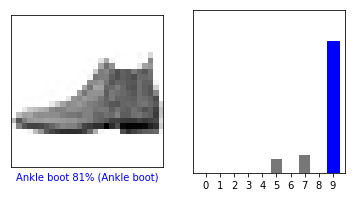

In [22]:
i = 0 
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

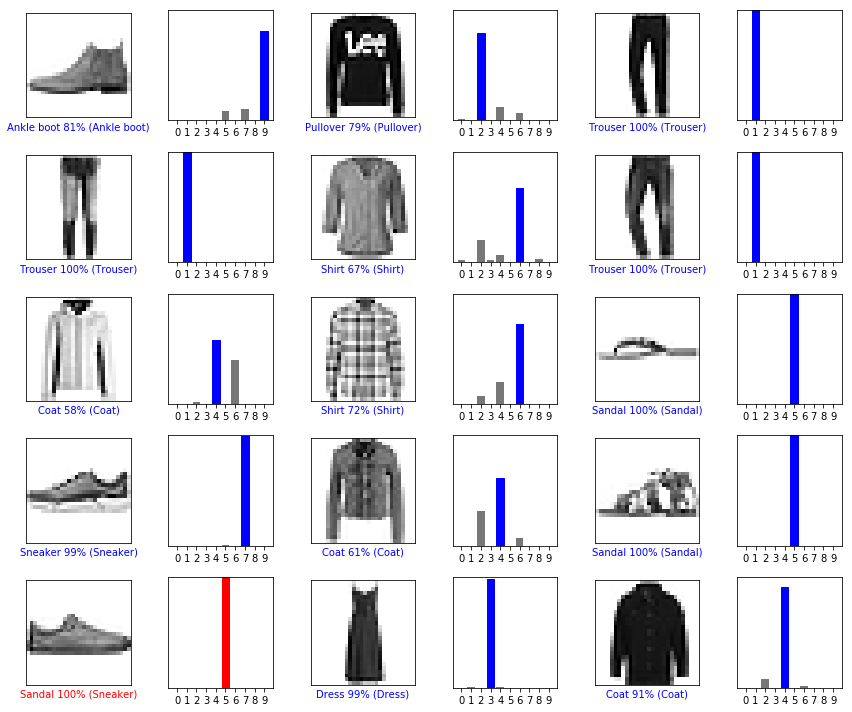

In [23]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()